## Importing libraries

In [1]:
import pandas as pd # to load and manipulate data and for One-Hot Encoding
import numpy as np # to calculate the mean and standard deviation
import matplotlib.pyplot as plt # to draw graphs
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn.metrics import accuracy_score # to calculate the accuracy of the model

/home/sannhtet/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


## Import the Data

In [2]:
df = pd.read_csv('processed.cleveland.data', header=None)

# Print the five rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


We see that instead of nice column names, we just have column numbers. Since nice columns names would make it easier to know how to format the data, let's replace the column numbers with the following column names:

- age
- sex
- cp, chest pain
- restbp, resting blood pressure (in mm Hg)
- chol, serum cholesterol in mg/dl
- fbs, fasting blood sugar
- restecg, resting electrocardiographic results
- thalach, maximum heart rate achieved
- exang, exercise induced angina
- oldpeak, ST depression induced by exercise relative to rest
- slope, the slope of the peak exercise ST segment
- ca, number of major vessels (0-3) colored by fluoroscopy
- thal, this is short of thalium heart scan
- hd, diagnosis of heart disease, the predicted attribute

In [3]:
# Change the column numbers to column names

df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']

# Print the first rows (including the column names)
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Identifying and Dealing with Missing Data

In [4]:
# dtypes tell us the "data type" for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [5]:
# Print out unique values in the column called 'ca'
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [6]:
# Print out unique values in the column called 'thal'
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [7]:
# print the number of rows that contain missing values
# loc[], short for "location" let's us specify which rows we want...
# and so we say we want any row with '?' in column 'ca'
# OR
# any row with '?' in column 'thal'
# len(), short for "length" prints out the number of rows

len(df.loc[(df['ca'] == '?')
          |
           (df['thal'] == '?')])

6

In [8]:
# Print out the rows that contain missing values
df.loc[(df['ca'] == '?')
          |
           (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [9]:
df.shape

(303, 14)

In [10]:
# Use loc[] to select all rows that do not contain missing values
# and save them in a new dataframe called "df_no_missing"
df_no_missing = df.loc[(df['ca'] != '?')
                      &
                       (df['thal'] != '?')]

In [11]:
df_no_missing.shape

(297, 14)

In [12]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [13]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [14]:
df_no_missing.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
hd         0
dtype: int64

## Format Data Part1: Split the Data into Dependent and Independent Variables

In [15]:
# Make a new copy of the columns used to make predictions
X = df_no_missing.drop('hd', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1]
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
# Make a new copy of the column of data we want to predict
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

## Format the Data Part 2: One-Hot Encoding

In [17]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

So, we see that age, restbp, chol and thalach are all float64, which is good, because we want them to be floating point numbers. All of the other columns, however, need to be inspected to make sure they only contain reasonable values, and some of them need to change. This is because, while scikit learn Decision Tree natively support continuous data, like resting blood preasure (restbp) and maximum heart rate (thalach), they do not natively support categorical data, like chest pain (cp), which contains 4 different categories. Thus, in order to use categorical data with scikit-learn DEcision Trees, we need to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called One-Hot Encoding.

In [18]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [19]:
# I will use get_dummies() to do One-Hot Encoding
# but just know there are other options
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope',
                                       'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [20]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

Just a purpose for tutorial, I'm gonna make a tree a simple classification and only care whether someone has heart disease or not. So we need to convert all numbers > 0 to 1.

In [21]:
y_not_zero_index = y > 0 # get the index for each non-zero value in y
y[y_not_zero_index] = 1  # set each non-zero value in y to 1
y.unique()

array([0, 1], dtype=int64)

## Build A Preliminary Classification Tree

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

# Create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5775862068965517, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.34051724137931033, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.21982758620689655, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'oldpeak <= 1.7\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 

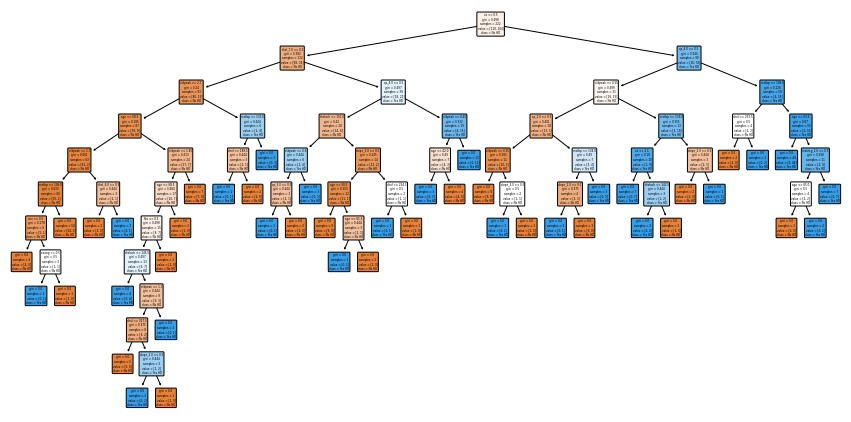

In [23]:
# Note: We can plot the tree and it is huge
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)

/home/sannhtet/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


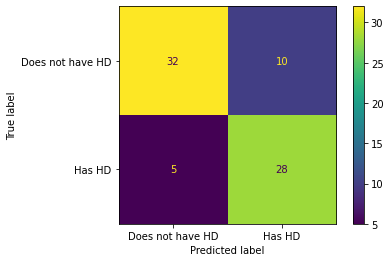

In [24]:
# plot_confusion_matrix() will run the test data down the tree and draw
# a confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

In [25]:
y_pred = clf_dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.8

## Cost Complexity Pruning Part1: Visualize alpha

In [26]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha
ccp_alphas = path.ccp_alphas # extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum value for alpha

clf_dts = [] # create an array that we will put decision trees into

# now create one decision tree per value for alpha and store it in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

Now let's graph the accuracy of the trees using the Training Dataset and the Testing Dataset as a function of alpha

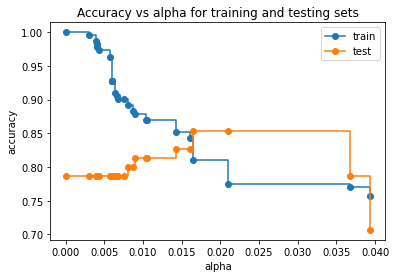

In [27]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

## Cost Complexity Pruning Part2: Cross Validation For Finding the Best Alpha

<AxesSubplot:xlabel='tree'>

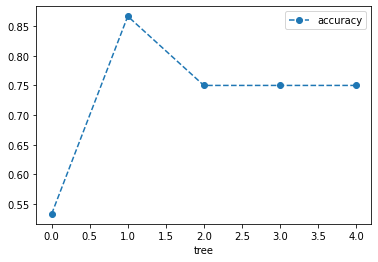

In [28]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016) # create the tree with ccp_alpha=0.016

# Now use 5-fold cross validation create 5 different training and testing datasets that
# are then used to train and test the tree.
# NOTE: I use 5-fold because I don't have tons of data...
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

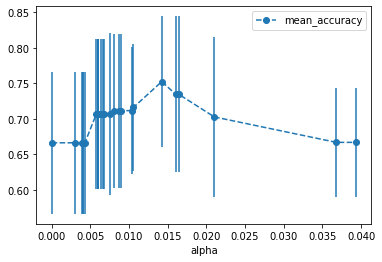

In [29]:
# Create an array to store the results of each fold during cross validation
alpha_loop_values = []

# For each candidates value for alpha, we will run 5-fold cross validation
# Then we will store the mean and standard deviation of the scores (the accuracy) for each call
# to cross_val_score in alpha_loop_values...
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can draw a graph of the means and standard deviations of the scores
# for each candidate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha', 'mean_accuracy', 'std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

Using cross validation, we can see that, over all, instead of setting ccp_alpha=0.016, we need to set it to something closer to 0.014. We can find the exact value with:

In [30]:
alpha_results[(alpha_results['alpha'] > 0.014)
             &
              (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.752323,0.091956


In [31]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)
                               &
                                (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [32]:
type(ideal_ccp_alpha)

pandas.core.series.Series

In [33]:
# Convert ideal_ccp_alpha from a series to a float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.01422475106685633

## Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

In [34]:
# Build and train a new decision tree, only this time use the optimal value for alpha
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01422475106685633, random_state=42)

/home/sannhtet/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


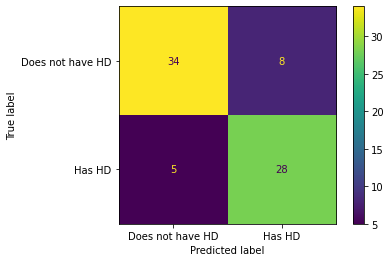

In [35]:
plot_confusion_matrix(clf_dt_pruned,
                      X_test,
                      y_test,
                      display_labels=["Does not have HD", "Has HD"])

In [36]:
y_pred = clf_dt_pruned.predict(X_test)

accuracy_score(y_test, y_pred)

0.8266666666666667

[Text(0.5769230769230769, 0.875, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.3076923076923077, 0.625, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.15384615384615385, 0.375, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.07692307692307693, 0.125, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(0.46153846153846156, 0.375, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(0.38461538461538464, 0.125, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(0.5384615384615384, 0.125, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(0.8461538461538461, 0.625, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(0.7692307692307693, 0.375, 'oldpeak <= 0.5

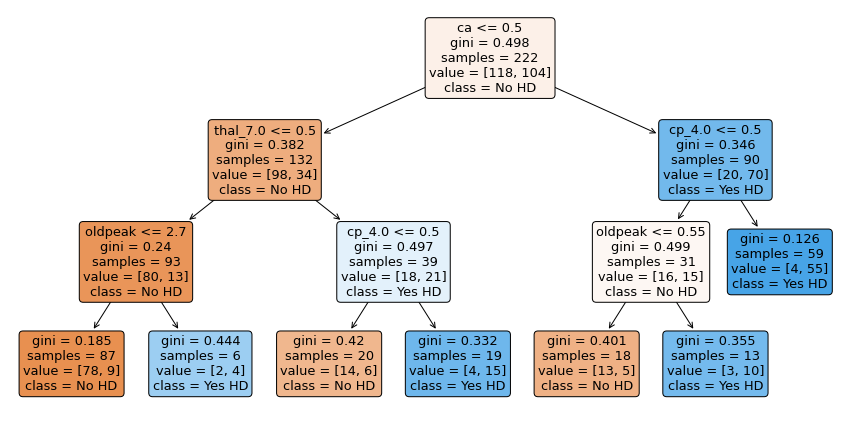

In [37]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned, filled=True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)